<a href="https://colab.research.google.com/github/pras-4795/AIMLColab/blob/master/dance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [0]:
df = pd.read_csv('/content/drive/My Drive/Dance/dataset/train.csv')

In [3]:
df['target'].unique()

array(['manipuri', 'bharatanatyam', 'odissi', 'kathakali', 'kathak',
       'sattriya', 'kuchipudi', 'mohiniyattam'], dtype=object)

In [0]:
  #p = os.path.join('/content/drive/My Drive/Dance/dataset/train', df['Image'][0])
  #image = cv2.imread(p)
  #g = cv2.resize(image, (1920, 1080))
  #g.shape
  #do not execute this is for 2d

In [0]:
X = np.zeros((1,255,255))
Y = np.array([])

In [0]:
#largest width = 4477, largest height = 3872
for index, row in df.iterrows():
  p = os.path.join('/content/drive/My Drive/Dance/dataset/train', row['Image'])
  image = cv2.imread(p,cv2.IMREAD_GRAYSCALE)
  g = cv2.resize(image, (255, 255))
  g = np.reshape(g,(1,255,255))
  X = np.append(X,g,axis=0)
  Y = np.append(Y,row['target'])

In [0]:
X = np.delete(X,0,0)

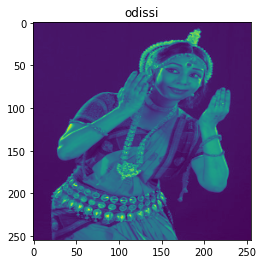

In [8]:
# as opencv loads in BGR format by default, we want to show it in RGB.
plt.imshow(X[2])
plt.title(Y[2])
plt.show()

In [0]:
#def get_max_width(img):
 #   return img.shape[1]

#def get_max_height(img):
 #   return img.shape[0]

In [0]:
#w = max(X, key=get_max_width).shape[1]
#h = max(X, key=get_max_height).shape[0]

In [0]:
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(Y)

onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
Y = onehot_encoder.fit_transform(integer_encoded)

In [12]:
Y.shape

(364, 8)

In [0]:
X = X/255

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [14]:
from keras.models import Sequential
from keras.layers import Convolution1D, Activation, MaxPooling1D, Dense, Flatten
#import SpatialPyramidPooling

Using TensorFlow backend.


In [49]:
model = Sequential()

model.add(Convolution1D(32, 3, input_shape=(255,255)))
model.add(Activation('relu'))
model.add(Convolution1D(64, 3))
model.add(MaxPooling1D(pool_size=(2)))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=(2)))
model.add(Convolution1D(128, 3))
model.add(Activation('relu'))
model.add(Convolution1D(64, 3))
model.add(Activation('relu'))
#model.add(SpatialPyramidPooling.SpatialPyramidPooling([1, 2, 4]))
model.add(Flatten())
model.add(Dense(500))
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(8))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


model.fit(X_train, y_train, epochs=30)

Epoch 1/30
291/291 [==============================] - 1s 4ms/step - loss: 2.1035 - accuracy: 0.1031
Epoch 2/30
291/291 [==============================] - 1s 4ms/step - loss: 2.0556 - accuracy: 0.1787
Epoch 3/30
291/291 [==============================] - 1s 4ms/step - loss: 1.9999 - accuracy: 0.2234
Epoch 4/30
291/291 [==============================] - 1s 4ms/step - loss: 1.8356 - accuracy: 0.3162
Epoch 5/30
291/291 [==============================] - 1s 4ms/step - loss: 1.7553 - accuracy: 0.3333
Epoch 6/30
291/291 [==============================] - 1s 4ms/step - loss: 1.5757 - accuracy: 0.4570
Epoch 7/30
291/291 [==============================] - 1s 4ms/step - loss: 1.4810 - accuracy: 0.4536
Epoch 8/30
291/291 [==============================] - 1s 4ms/step - loss: 1.3962 - accuracy: 0.5086
Epoch 9/30
291/291 [==============================] - 1s 4ms/step - loss: 1.1804 - accuracy: 0.5704
Epoch 10/30
291/291 [==============================] - 1s 4ms/step - loss: 1.0919 - accuracy: 0.6357

In [51]:
model.evaluate(X_test, y_test)

73/73 [==============================] - 0s 1ms/step


[7.769970985308086, 0.3287671208381653]

In [0]:
p = model.predict(X_test)

In [0]:
from sklearn.metrics import confusion_matrix

In [38]:
label_encoder.inverse_transform([np.argmax(p[1])])

array(['kuchipudi'], dtype='<U32')

In [0]:
#convert p into values, y_test into values then compare